# Census data for New York CIty boroughs
An Excel file for total population by age, sex, and borough for New York City is available at https://www1.nyc.gov/site/planning/planning-level/nyc-population/census-2010.page.

From an inspection of the Excel file, the columns headings begin on row 7, and after that, useable data begins 3 rows later.  Also, the male and female columns are provided for each borough and the Excel file gives the borough name in a merged cell above those two columns. Finally, the last three rows also do not contain useable data because they are not for single years but are year ranges.

In [1]:
# %matplotlib
import pandas as pd

# read the Excel file
df_raw_data = pd.read_excel('totpop_singage_sex2010_boro.xlsx', header=6)

# delete the first two (non-useable) data rows (after the column headings) and the last three rows
df_census_data = df_raw_data.drop(df_raw_data.index[[0, 1, 2, -3, -2, -1]])

# reset the index and drop original index
df_census_data.reset_index(drop = True, inplace = True)
df_census_data.head()

,Unnamed: 0,Male,Female,Male.1,Female.1,Male.2,Female.2,Male.3,Female.3,Male.4,Female.4,Male.5,Female.5
0,1,53490.0,51142.0,10553.0,10142.0,18201.0,17648.0,8294.0,7841.0,13609.0,12836.0,2833.0,2675.0
1,2,52991.0,51093.0,10537.0,10249.0,17972.0,17525.0,7643.0,7387.0,13811.0,13153.0,3028.0,2779.0
2,3,51985.0,49723.0,10463.0,10073.0,17877.0,16915.0,7215.0,6989.0,13493.0,12906.0,2937.0,2840.0
3,4,50129.0,48148.0,10228.0,9845.0,17070.0,16645.0,6861.0,6612.0,13030.0,12236.0,2940.0,2810.0
4,5,49797.0,47490.0,10268.0,9820.0,16913.0,16071.0,6680.0,6280.0,12907.0,12435.0,3029.0,2884.0


In [2]:
#  rename the columns with a borough name prefix
column_name_changes = {'Unnamed: 0': 'Age',
                       'Male': 'New York City (M)',   'Female': 'New York City (F)',
                       'Male.1': 'Bronx (M)',         'Female.1': 'Bronx (F)',
                       'Male.2': 'Brooklyn (M)',      'Female.2': 'Brooklyn (F)',
                       'Male.3': 'Manhattan (M)',     'Female.3': 'Manhattan (F)',
                       'Male.4': 'Queens (M)',        'Female.4': 'Queens (F)',
                       'Male.5': 'Staten Island (M)', 'Female.5': 'Staten Island (F)',
                      }
column_names = ['age','nyc_male','nyc_female','bronx_male','bronx_female','brooklyn_male','brooklyn_female',
                'manhattan_male','manhattan_female','queens_male','queens_female','staten_island_male',
                'staten_island_female']

df_census_data.rename(columns = column_name_changes, inplace = True)
df_census_data.columns = column_names
df_census_data.head()

,age,nyc_male,nyc_female,bronx_male,bronx_female,brooklyn_male,brooklyn_female,manhattan_male,manhattan_female,queens_male,queens_female,staten_island_male,staten_island_female
0,1,53490.0,51142.0,10553.0,10142.0,18201.0,17648.0,8294.0,7841.0,13609.0,12836.0,2833.0,2675.0
1,2,52991.0,51093.0,10537.0,10249.0,17972.0,17525.0,7643.0,7387.0,13811.0,13153.0,3028.0,2779.0
2,3,51985.0,49723.0,10463.0,10073.0,17877.0,16915.0,7215.0,6989.0,13493.0,12906.0,2937.0,2840.0
3,4,50129.0,48148.0,10228.0,9845.0,17070.0,16645.0,6861.0,6612.0,13030.0,12236.0,2940.0,2810.0
4,5,49797.0,47490.0,10268.0,9820.0,16913.0,16071.0,6680.0,6280.0,12907.0,12435.0,3029.0,2884.0


In [3]:
# inspect the bottom for valid data (non-single years)
df_census_data.tail()

,age,nyc_male,nyc_female,bronx_male,bronx_female,brooklyn_male,brooklyn_female,manhattan_male,manhattan_female,queens_male,queens_female,staten_island_male,staten_island_female
94,95,891.0,3023.0,149.0,450.0,257.0,828.0,198.0,685.0,244.0,878.0,43.0,182.0
95,96,617.0,2257.0,106.0,373.0,183.0,590.0,136.0,560.0,172.0,635.0,20.0,99.0
96,97,494.0,1714.0,68.0,263.0,141.0,467.0,115.0,419.0,156.0,468.0,14.0,97.0
97,98,316.0,1198.0,55.0,212.0,94.0,327.0,69.0,262.0,87.0,349.0,11.0,48.0
98,99,249.0,906.0,44.0,169.0,71.0,217.0,49.0,222.0,75.0,260.0,10.0,38.0


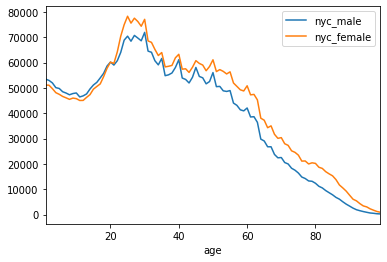

In [4]:
# plot the total male and female population for the 5 boroughs
df_census_data.plot('age',['nyc_male','nyc_female'],kind = 'line')